In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Aggregate the Sales_Qty for each Store-SKU at a month level; detect any Outliers in the
Sales_Qty for each Store-SKU combination and apply an outlier treatment on the same.
Specify the outlier treatment technique.

In [6]:
secondary_sales = pd.read_csv("WC_DS_Ex1_Sec_Sales.csv",parse_dates=[3],index_col=[3]).sort_index()
secondary_sales.head()

,Store_Code,SKU_Code,Category,Sales_Qty,MRP,SP
Date,,,,,,
2016-01-01,Store3,603693,Cat1,1,1095.0,1095.0
2016-01-01,Store3,614427,Cat2,1,645.0,645.0
2016-01-01,Store1,610221,Cat1,1,1095.0,808.7
2016-01-01,Store2,600252,Cat1,1,1095.0,808.7
2016-01-01,Store3,600960,Cat2,1,795.0,795.0


In [19]:
#print(secondary_sales['Store_Code'].value_counts())
#print(secondary_sales['SKU_Code'].value_counts())
#print(secondary_sales['Category'].value_counts())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


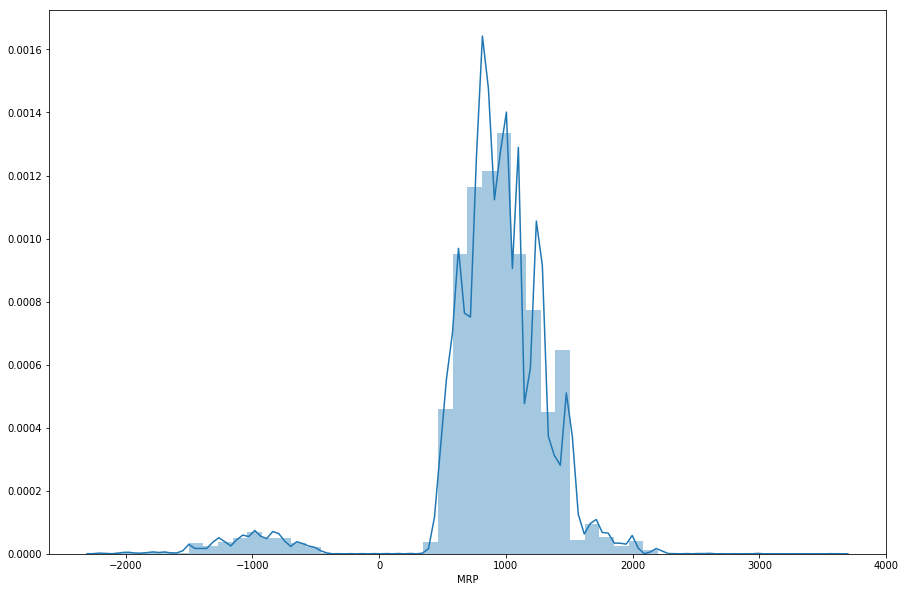

In [12]:
#Distribution of MRP and sales price
plt.figure(figsize=(15,10))
d1 = sns.distplot(secondary_sales['MRP'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


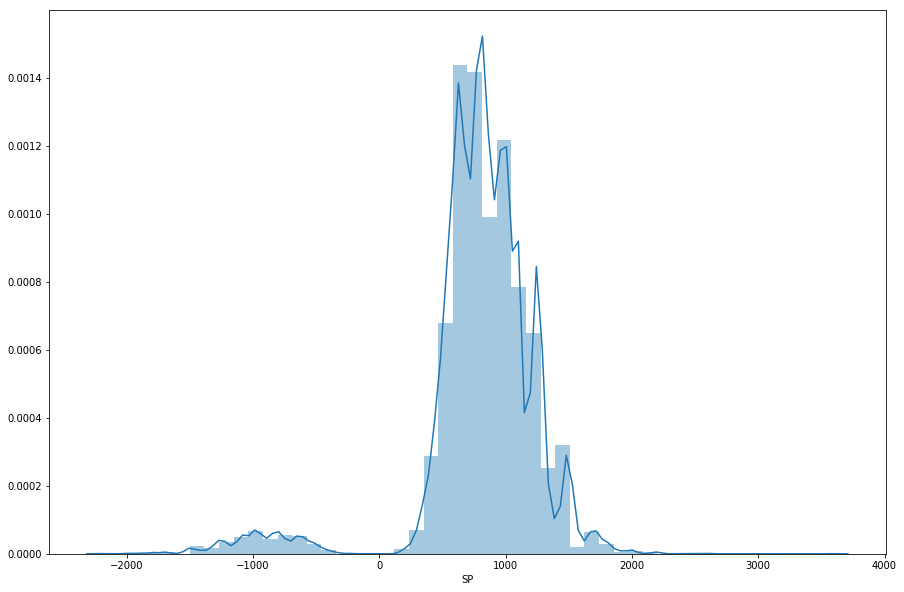

In [13]:
#Distribution of MRP and sales price
plt.figure(figsize=(15,10))
d1 = sns.distplot(secondary_sales['SP'])

 1    23410
-1     1103
 2       41
Name: Sales_Qty, dtype: int64

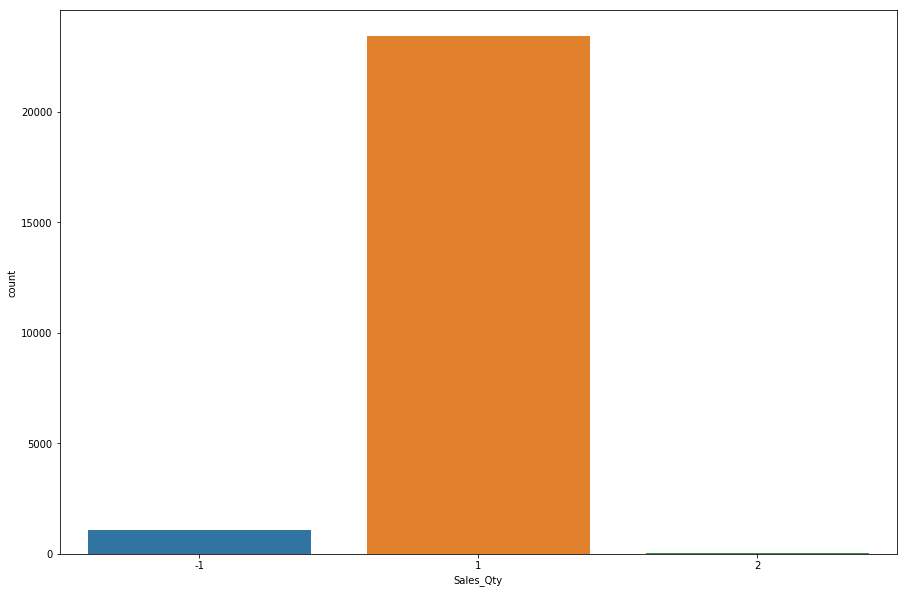

In [24]:
#Distribution of MRP and sales price
plt.figure(figsize=(15,10))
d1 = sns.countplot(secondary_sales['Sales_Qty'])
secondary_sales['Sales_Qty'].value_counts()

In [26]:
secondary_sales.head()

,Store_Code,SKU_Code,Category,Sales_Qty,MRP,SP
Date,,,,,,
2016-01-01,Store3,603693,Cat1,1,1095.0,1095.0
2016-01-01,Store3,614427,Cat2,1,645.0,645.0
2016-01-01,Store1,610221,Cat1,1,1095.0,808.7
2016-01-01,Store2,600252,Cat1,1,1095.0,808.7
2016-01-01,Store3,600960,Cat2,1,795.0,795.0


In [28]:
sales_detail = secondary_sales[['Store_Code','Sales_Qty']]

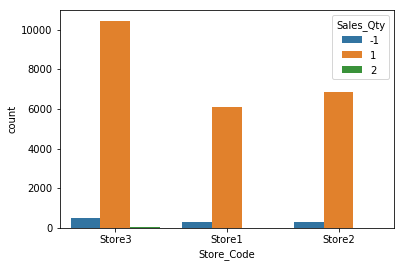

In [31]:
c1 = sns.countplot(sales_detail['Store_Code'],hue=sales_detail['Sales_Qty'])

What is 2 in this case . I can't understand

In [34]:
primary_sales = pd.read_csv("WC_DS_Ex1_Pri_Sales.csv",parse_dates=[3],index_col=[3]).sort_index()
primary_sales.head()

,Store_Code,SKU_Code,Category,Qty
Date,,,,
2015-12-11,Store1,603132,Cat1,2
2015-12-11,Store1,614490,Cat2,1
2015-12-11,Store3,603819,Cat2,2
2015-12-11,Store3,603810,Cat2,1
2015-12-11,Store3,603417,Cat3,1


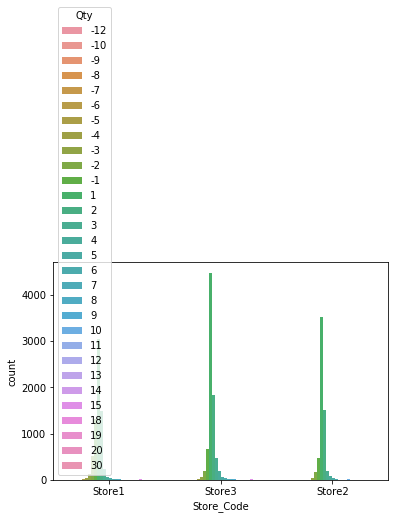

In [37]:
c1 = sns.countplot(primary_sales['Store_Code'],hue=primary_sales['Qty'])

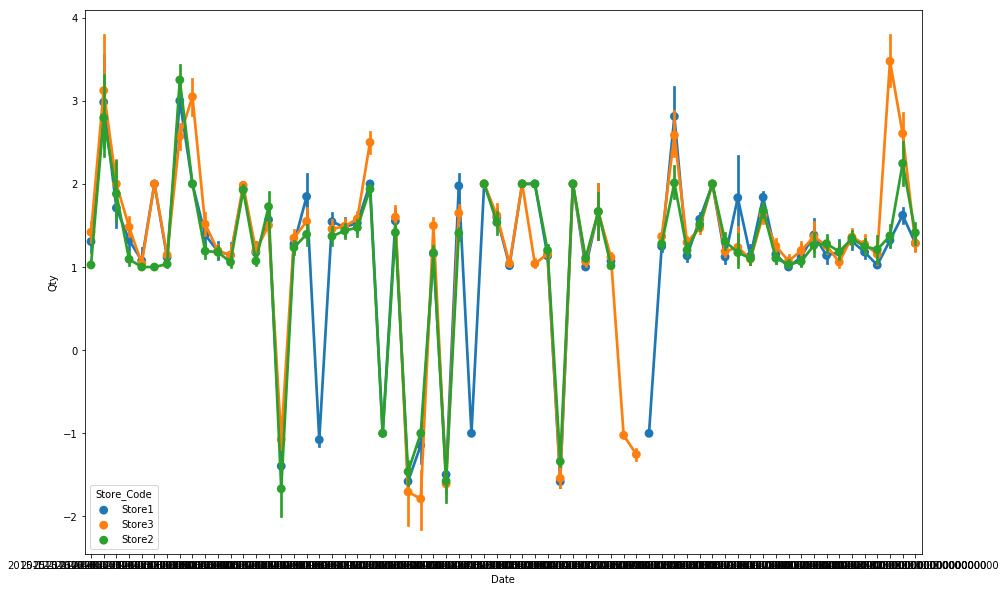

In [40]:
plt.figure(figsize=(15,10))
p1 = sns.pointplot(x=primary_sales.index,y=primary_sales['Qty'],hue='Store_Code',data=primary_sales)

In [43]:
primary_sales['Store_Code'].value_counts()

Store3    8109
Store1    6964
Store2    6042
Name: Store_Code, dtype: int64

In terms of definition, an outlier is an observation that significantly differs from other observations of the same feature. If a time series is plotted, outliers are usually the unexpected spikes or dips of observations at given points in time.

In [44]:
Store1 =  primary_sales['Store_Code'] == 'Store1'
Store1_sales = primary_sales[Store1]
Store1_sales.head()

,Store_Code,SKU_Code,Category,Qty
Date,,,,
2015-12-11,Store1,603132,Cat1,2
2015-12-11,Store1,614490,Cat2,1
2015-12-11,Store1,601431,Cat1,1
2015-12-11,Store1,602055,Cat4,1
2015-12-11,Store1,602793,Cat4,1


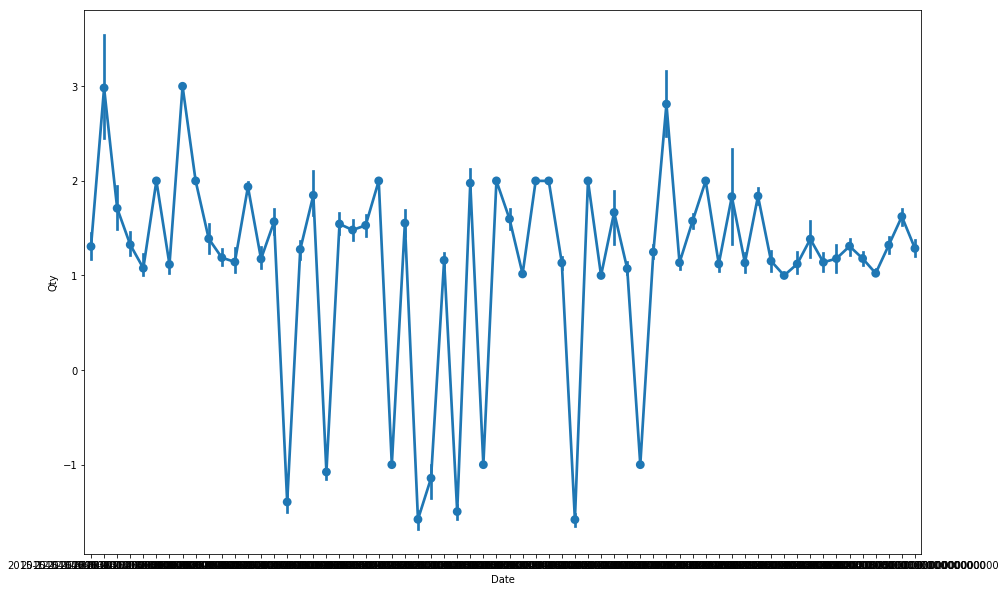

In [49]:
#Plot for sales for time 
plt.figure(figsize=(15,10))
p1 = sns.pointplot(x=Store1_sales.index,y=Store1_sales['Qty'],data=Store1_sales)

In [50]:
Store1_monthly = Store1_sales.resample('M').sum()
Store1_monthly.head()

,SKU_Code,Qty
Date,,
2015-12-31,154015452,557
2016-01-31,56563491,120
2016-02-29,91075563,314
2016-03-31,96073044,268
2016-04-30,0,0


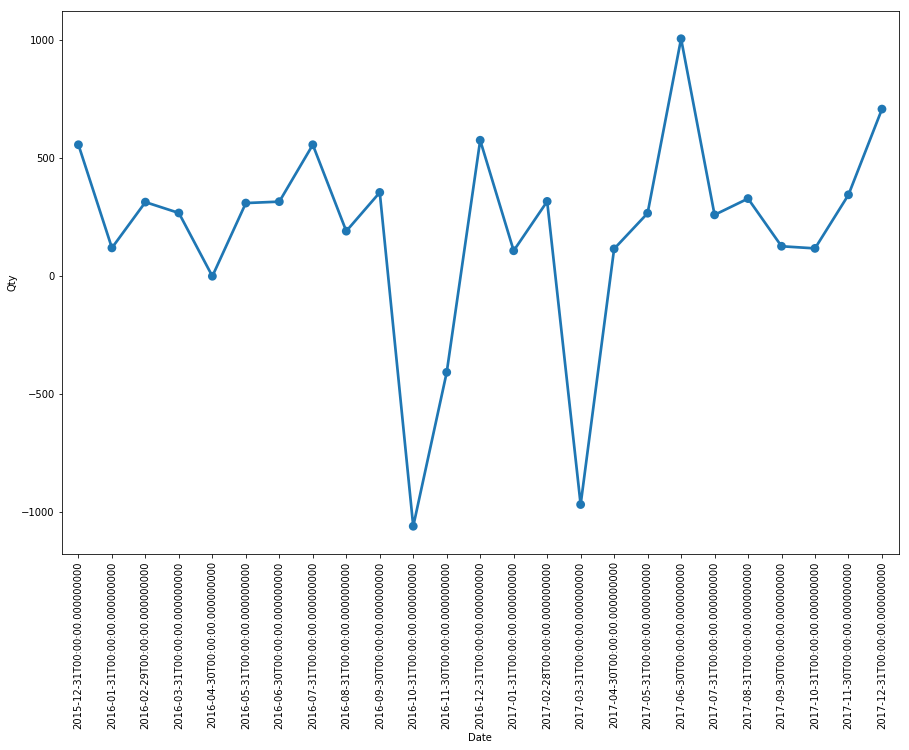

In [55]:
#Plot for sales for time 
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
p1 = sns.pointplot(x=Store1_monthly.index,y=Store1_monthly['Qty'],data=Store1_monthly)

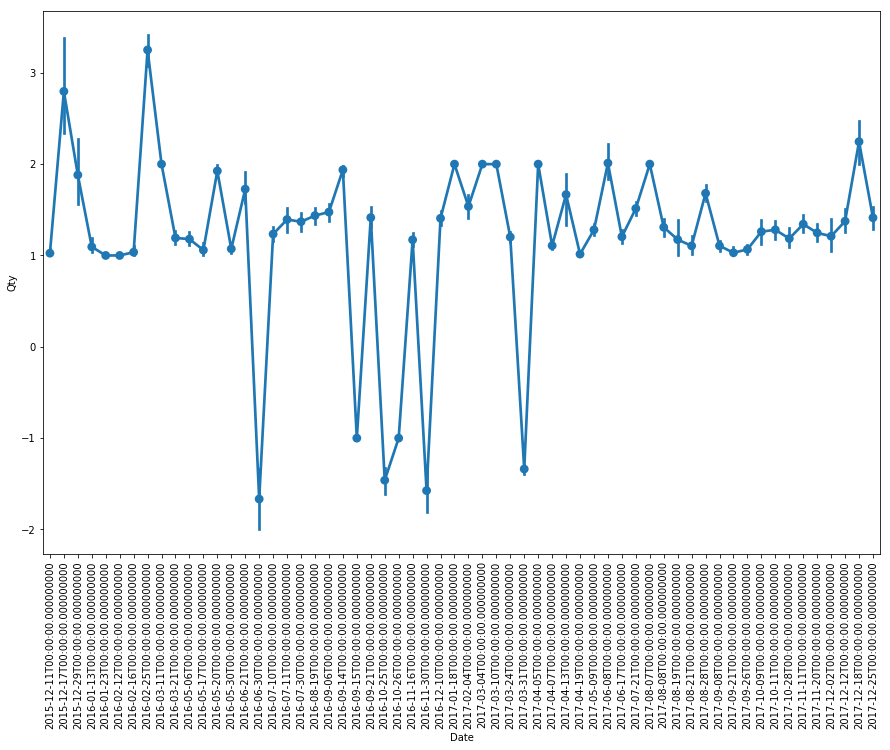

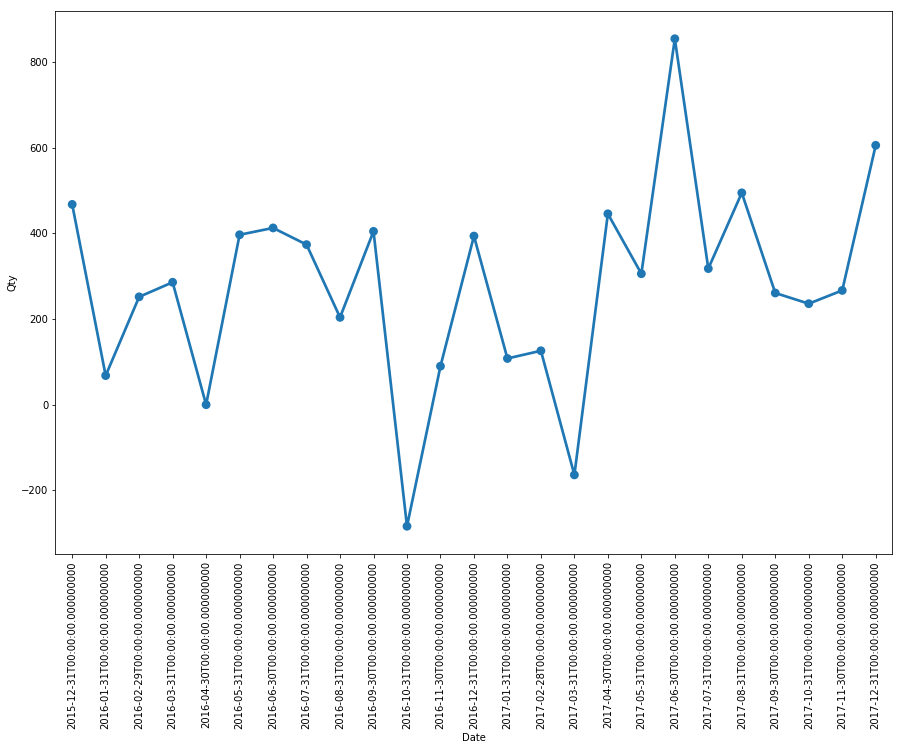

In [59]:
Store2 =  primary_sales['Store_Code'] == 'Store2'
Store2_sales = primary_sales[Store2]
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
p1 = sns.pointplot(x=Store2_sales.index,y=Store2_sales['Qty'],data=Store2_sales)
Store2_sales.head()
Store2_monthly = Store2_sales.resample('M').sum()
Store2_monthly.head()
#Plot for sales for time 
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
p1 = sns.pointplot(x=Store2_monthly.index,y=Store2_monthly['Qty'],data=Store2_monthly)

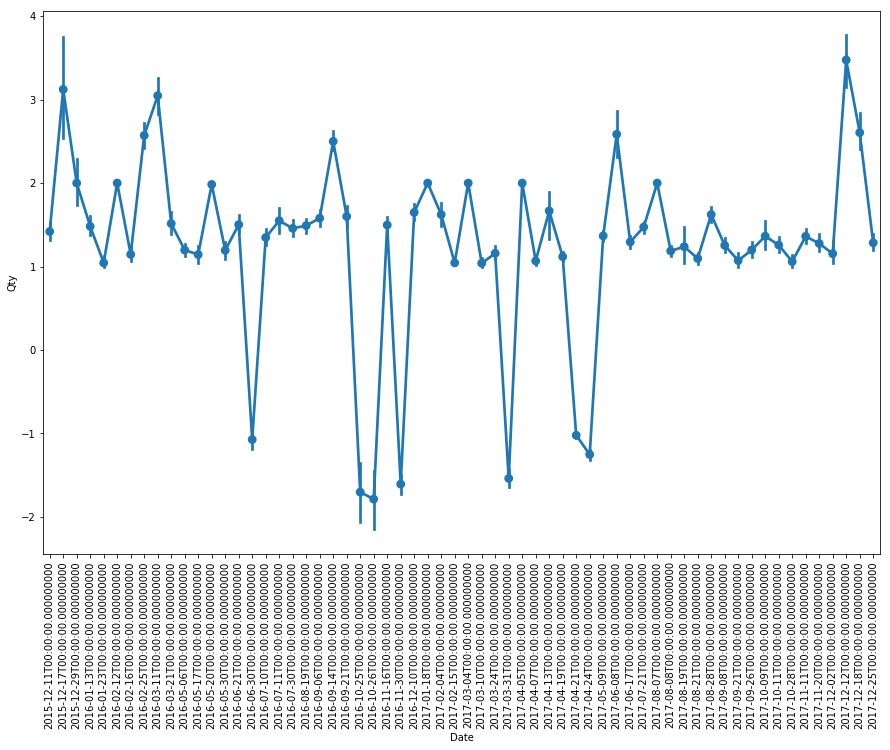

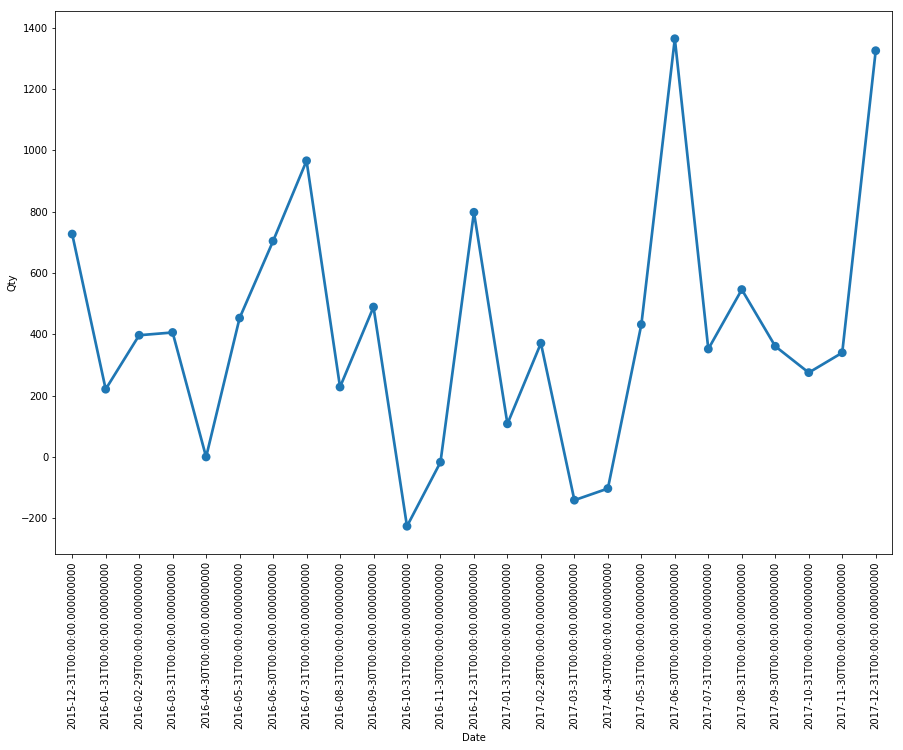

In [58]:
Store3 =  primary_sales['Store_Code'] == 'Store3'
Store3_sales = primary_sales[Store3]
Store3_sales.head()
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
p1 = sns.pointplot(x=Store3_sales.index,y=Store3_sales['Qty'],data=Store3_sales)
Store3_monthly = Store3_sales.resample('M').sum()
Store3_monthly.head()
#Plot for sales for time 
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
p1 = sns.pointplot(x=Store3_monthly.index,y=Store3_monthly['Qty'],data=Store3_monthly)

Anomaly detection problem for time series is usually formulated as finding outlier data points relative to some standard or usual signal. While there are plenty of anomaly types, we’ll focus only on the most important ones from a business perspective, such as unexpected spikes, drops, trend changes and level shifts.

Imagine you track users at your website and see an unexpected growth of users in a short period of time that looks like a spike. These types of anomalies are usually called additive outliers.



In [61]:
Store1_sales.drop(column=['Store_Code','SKU_Code'])

,Store_Code,SKU_Code,Category,Qty
Date,,,,
2015-12-11,Store1,603132,Cat1,2
2015-12-11,Store1,614490,Cat2,1
2015-12-11,Store1,601431,Cat1,1
2015-12-11,Store1,602055,Cat4,1
2015-12-11,Store1,602793,Cat4,1


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''